##Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#!ls "/content/drive/My Drive"

file_path = '/content/drive/My Drive/Data.csv'
if os.path.exists(file_path):
      print("File exists")
else:
    print("File does not exist")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File exists


##Load the dataset

In [ ]:
# Step 1:Load the dataset

df = pd.read_csv(file_path)
#print entire dataframe
print(df)

# Verify that 'Country' exists
print("Columns in df after loading:")
print(df.columns)

print("Columns in df:")
print(df.columns)

print("First few rows of df:")
print(df.head())

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes
Columns in df after loading:
Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')
Columns in df:
Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')
First few rows of df:
   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes


In [ ]:
# Step 2: Impute missing values for the 'Country' column in the original df
categorical_imputer = SimpleImputer(strategy='most_frequent')
df['Country'] = categorical_imputer.fit_transform(df[['Country']]).ravel()

# Step 3: Define features (x) and target (y)
x = df.drop('Purchased', axis=1)
y = df['Purchased']

# Step 4: OneHotEncode the 'Country' column
onehot_encoder = OneHotEncoder()
countries_encoded = onehot_encoder.fit_transform(x[['Country']]).toarray()
country_df = pd.DataFrame(countries_encoded, columns=onehot_encoder.get_feature_names_out(['Country']))
x = pd.concat([x, country_df], axis=1).drop(['Country'], axis=1)

# Step 5: Impute missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
x[['Age', 'Salary']] = numerical_imputer.fit_transform(x[['Age', 'Salary']])

# Step 5: Scale numerical columns
scaler = StandardScaler()
x[['Age', 'Salary']] = scaler.fit_transform(x[['Age', 'Salary']])

# Step 6: Verify preprocessing
print("Columns in x after preprocessing:")
print(x.columns)





Columns in x after preprocessing:
Index(['Age', 'Salary', 'Country_France', 'Country_Germany', 'Country_Spain'], dtype='object')


###Feature Scaling

In [ ]:
scaler = StandardScaler()
x[['Age', 'Salary']] = scaler.fit_transform(x[['Age', 'Salary']])

##Step 4: Splitting the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print('Preprocessing Complete!')
print('Training features: \n', x_train.head())
print('Target values: \n', y_train.head())

Preprocessing Complete!
Training features: 
         Age    Salary  Country_France  Country_Germany  Country_Spain
5 -0.548973 -0.526657             1.0              0.0            0.0
0  0.758874  0.749473             1.0              0.0            0.0
7  1.340140  1.387538             1.0              0.0            0.0
2 -1.275555 -0.891265             0.0              1.0            0.0
9 -0.258340  0.293712             1.0              0.0            0.0
Target values: 
 5    Yes
0     No
7    Yes
2     No
9    Yes
Name: Purchased, dtype: object


###Initialize the model

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

###Make predictions

In [ ]:
y_pred = model.predict(x_test)

###Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

###Print Evaluation metrics

In [ ]:
print(f'Model Accuracy: {accuracy * 100:.2f}%')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Model Accuracy: 0.00%

Confusion Matrix:
 [[0 1]
 [1 0]]

Classification Report:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00       1.0
         Yes       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



###Visualize the results

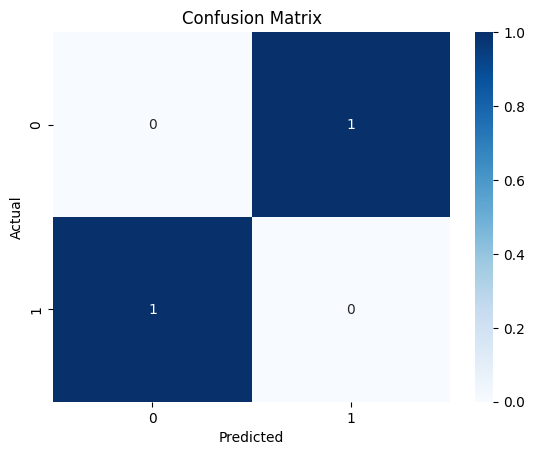

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Save and document

In [ ]:
x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
